<a href="https://colab.research.google.com/github/benvictoria21/python-machine-learning/blob/master/2_Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
mushroom_df = pd.read_csv("https://raw.githubusercontent.com/Derrick-Sherrill/tf-2-examples/master/classifications/Mushrooms/mushrooms.csv")

In [3]:
mushroom_df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
mushroom_df.shape

(8124, 23)

In [5]:
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
mushroom_df.groupby(['class', 'odor']).count()

cap-shape  cap-surface  ...  population  habitat
class odor                          ...                     
e     a           400          400  ...         400      400
      l           400          400  ...         400      400
      n          3408         3408  ...        3408     3408
p     c           192          192  ...         192      192
      f          2160         2160  ...        2160     2160
      m            36           36  ...          36       36
      n           120          120  ...         120      120
      p           256          256  ...         256      256
      s           576          576  ...         576      576
      y           576          576  ...         576      576

[10 rows x 21 columns]

In [7]:
labels = mushroom_df['class']
features = mushroom_df.drop(columns=['class'])

In [8]:
labels[0:5]

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [9]:
features[0:5]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [10]:
labels.replace('p', 0, inplace=True)
labels.replace('e', 1, inplace=True)
labels[0:5]

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [11]:
features = pd.get_dummies(features)
features[0:5]

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [12]:
features = features.values.astype('float32')
labels = labels.values.astype('float32')

In [13]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)
features_train, features_validation, labels_train, labels_validation = train_test_split(features_train, labels_train, test_size=0.2)

In [14]:
model = keras.Sequential([keras.layers.Dense(32, input_shape=(117,)),
                          keras.layers.Dense(20, activation=tf.nn.relu),
                         keras.layers.Dense(2,activation='softmax')])

In [15]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [16]:
history = model.fit(features_train, labels_train, epochs=20, validation_data=(features_validation, labels_validation))

Epoch 1/20
163/163 [==============================] - 1s 4ms/step - loss: 0.1635 - acc: 0.9442 - val_loss: 0.0230 - val_acc: 0.9992
Epoch 2/20
163/163 [==============================] - 1s 4ms/step - loss: 0.0118 - acc: 0.9998 - val_loss: 0.0054 - val_acc: 1.0000
Epoch 3/20
163/163 [==============================] - 1s 4ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 4/20
163/163 [==============================] - 1s 4ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 5/20
163/163 [==============================] - 1s 4ms/step - loss: 7.9732e-04 - acc: 1.0000 - val_loss: 6.5154e-04 - val_acc: 1.0000
Epoch 6/20
163/163 [==============================] - 1s 4ms/step - loss: 4.8947e-04 - acc: 1.0000 - val_loss: 4.2097e-04 - val_acc: 1.0000
Epoch 7/20
163/163 [==============================] - 1s 3ms/step - loss: 3.2931e-04 - acc: 1.0000 - val_loss: 2.9804e-04 - val_acc: 1.0000
Epoch 8/20
163/163 [==============================] 

In [17]:
prediction_features = model.predict(features_test)
performance = model.evaluate(features_test, labels_test)
print(performance)

51/51 [==============================] - 0s 3ms/step - loss: 2.4449e-05 - acc: 1.0000
[2.4449416741845198e-05, 1.0]


In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

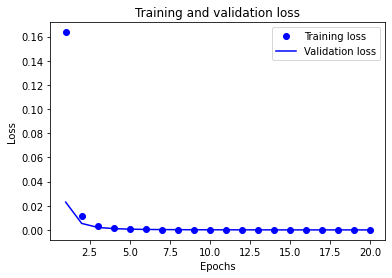

In [19]:
# Checking Overfit
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()